# <font color=blue> Predicting World GDP Based On Countries Social,Economic And Cultural Data</font>

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

## <font color=green>Loading the individual data, combining into one dataframe, and cleaning the data</font>

In [3]:
population_per_country = pd.read_csv('PopulationPerCountry.csv', skiprows = range(0,4))
population_per_country.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,NaN,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,NaN,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,NaN,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,NaN,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,NaN,NaN


In [4]:
GDP_Country = pd.read_csv('GDP by Country.csv', skiprows = range(0,4))
GDP_Country.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.004633e+10,2.005019e+10,1.921556e+10,1.946902e+10,NaN,NaN
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,7.549238e+10,8.247091e+10,1.041159e+11,1.153984e+11,1.249121e+11,1.267769e+11,1.029622e+11,9.533511e+10,NaN,NaN
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.133526e+10,1.186387e+10,NaN,NaN
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.858518e+09,NaN,NaN


In [5]:
GDP_Data = pd.merge(GDP_Country, population_per_country, on= ['Country Code','Country Name'], how='inner')
GDP_Data.head()

,Country Name,Country Code,Indicator Name_x,Indicator Code_x,1960_x,1961_x,1962_x,1963_x,1964_x,1965_x,...,2009_y,2010_y,2011_y,2012_y,2013_y,2014_y,2015_y,2016_y,2017_y,Unnamed: 62_y
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,NaN,NaN
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,NaN,NaN
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,NaN,NaN
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,NaN,NaN


In [6]:
GDP_Data = GDP_Data.drop(['Indicator Name_x','Indicator Code_x','Indicator Name_y','Indicator Code_y','Unnamed: 62_y','Unnamed: 62_x'], axis = 1)
GDP_Data.head()

,Country Name,Country Code,1960_x,1961_x,1962_x,1963_x,1964_x,1965_x,1966_x,1967_x,...,2008_y,2009_y,2010_y,2011_y,2012_y,2013_y,2014_y,2015_y,2016_y,2017_y
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,NaN
1,Afghanistan,AFG,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,NaN
2,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,NaN
3,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,NaN
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,NaN


In [7]:
GDP_Data1 = pd.DataFrame()
for col in GDP_Data.columns:
    if col.endswith("Name"):
        country = col[:]
        GDP_Data1[country] = GDP_Data[country]
    if col.endswith("_x"):
        year = col[:4]
        GDP_Data1[year] = GDP_Data[year + '_x']/GDP_Data[year + '_y']
    if col.endswith("Code"):
        code = col[:]
        GDP_Data1[code] = GDP_Data[code]
        
GDP_Data1.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27546.899390,24631.434860,24271.940421,25324.720362,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,59.777327,59.878153,58.492874,78.782758,82.208444,101.290471,137.899362,161.322,...,373.361116,445.893298,553.300289,603.537023,669.009051,631.744971,612.069651,569.577923,561.778746,NaN
2,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3868.578883,3347.844850,3529.053482,4299.012889,4598.249988,4804.616884,4709.312024,3695.793748,3308.700233,NaN
3,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4370.539647,4114.136545,4094.358832,4437.178068,4247.614308,4413.081697,4578.666728,3934.895394,4124.982390,NaN
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,47785.659086,43339.379875,39736.354063,41098.766942,38391.080867,40619.711298,42294.994727,36038.267604,36988.622030,NaN


In [8]:
GDP_Combine = pd.melt(GDP_Data1,id_vars=['Country Name','Country Code'])
GDP_Combine.head()

,Country Name,Country Code,variable,value
0,Aruba,ABW,1960,NaN
1,Afghanistan,AFG,1960,59.777327
2,Angola,AGO,1960,NaN
3,Albania,ALB,1960,NaN
4,Andorra,AND,1960,NaN


In [9]:
Women_Informed_Choices = pd.read_csv('WomenMakingInformedChoicestoReproductiveHealthCare.csv', skiprows = range(0,4))
Women_Informed_Choices.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,Women making their own informed decisions rega...,SG.DMK.SRCR.FN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Women making their own informed decisions rega...,SG.DMK.SRCR.FN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,Women making their own informed decisions rega...,SG.DMK.SRCR.FN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,Women making their own informed decisions rega...,SG.DMK.SRCR.FN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,61.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,Women making their own informed decisions rega...,SG.DMK.SRCR.FN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
Women_Informed_Choices = pd.melt(Women_Informed_Choices,id_vars = ['Country Name','Country Code','Indicator Name','Indicator Code'])
Women_Informed_Choices.head()

,Country Name,Country Code,Indicator Name,Indicator Code,variable,value
0,Aruba,ABW,Women making their own informed decisions rega...,SG.DMK.SRCR.FN.ZS,1960,NaN
1,Afghanistan,AFG,Women making their own informed decisions rega...,SG.DMK.SRCR.FN.ZS,1960,NaN
2,Angola,AGO,Women making their own informed decisions rega...,SG.DMK.SRCR.FN.ZS,1960,NaN
3,Albania,ALB,Women making their own informed decisions rega...,SG.DMK.SRCR.FN.ZS,1960,NaN
4,Andorra,AND,Women making their own informed decisions rega...,SG.DMK.SRCR.FN.ZS,1960,NaN


In [11]:
RuralPopulation_PerCent = pd.read_csv('RuralPopulationofTotalPopulation.csv', skiprows = range(0,4))
RuralPopulation_PerCent.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,Rural population (% of total population),SP.RUR.TOTL.ZS,49.224,49.239,49.254,49.270,49.285,49.300,...,56.579,56.941,57.302,57.636,57.942,58.221,58.472,58.696,NaN,NaN
1,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,91.779,91.492,91.195,90.890,90.574,90.250,...,75.687,75.311,74.926,74.532,74.129,73.718,73.297,72.868,NaN,NaN
2,Angola,AGO,Rural population (% of total population),SP.RUR.TOTL.ZS,89.565,89.202,88.796,88.376,87.942,87.496,...,60.701,59.903,59.100,58.301,57.510,56.726,55.950,55.181,NaN,NaN
3,Albania,ALB,Rural population (% of total population),SP.RUR.TOTL.ZS,69.295,69.057,68.985,68.914,68.842,68.770,...,48.924,47.837,46.753,45.670,44.617,43.591,42.593,41.624,NaN,NaN
4,Andorra,AND,Rural population (% of total population),SP.RUR.TOTL.ZS,41.550,39.017,36.538,34.128,31.795,29.555,...,11.648,12.183,12.740,13.292,13.835,14.367,14.885,15.388,NaN,NaN


In [12]:
RuralPopulation_PerCent = RuralPopulation_PerCent.drop(['Unnamed: 62'],axis = 1)
RuralPopulation_PerCent = pd.melt(RuralPopulation_PerCent,id_vars = ['Country Name','Country Code','Indicator Name','Indicator Code'])
RuralPopulation_PerCent.head()

,Country Name,Country Code,Indicator Name,Indicator Code,variable,value
0,Aruba,ABW,Rural population (% of total population),SP.RUR.TOTL.ZS,1960,49.224
1,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,1960,91.779
2,Angola,AGO,Rural population (% of total population),SP.RUR.TOTL.ZS,1960,89.565
3,Albania,ALB,Rural population (% of total population),SP.RUR.TOTL.ZS,1960,69.295
4,Andorra,AND,Rural population (% of total population),SP.RUR.TOTL.ZS,1960,41.550


In [13]:
PublicEducation_Expenditure = pd.read_csv('public-education-expenditure-as-share-of-gdp.csv')
PublicEducation_Expenditure.head()

,Entity,Code,Year,Public Expenditure on Education (percent of GDP)
0,Australia,AUS,1937,0.7
1,Australia,AUS,1960,1.4
2,Australia,AUS,1980,5.5
3,Australia,AUS,1993,6.0
4,Austria,AUT,1937,2.5


In [14]:
LegalRights_Strength = pd.read_csv('LegalRightsStrengthIndex.csv', skiprows = range(0,4))
LegalRights_Strength.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,Strength of legal rights index (0=weak to 12=s...,IC.LGL.CRED.XQ,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Strength of legal rights index (0=weak to 12=s...,IC.LGL.CRED.XQ,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,9.0,9.0,9.0,9.0,9.0
2,Angola,AGO,Strength of legal rights index (0=weak to 12=s...,IC.LGL.CRED.XQ,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0
3,Albania,ALB,Strength of legal rights index (0=weak to 12=s...,IC.LGL.CRED.XQ,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,7.0,6.0,6.0,6.0,8.0
4,Andorra,AND,Strength of legal rights index (0=weak to 12=s...,IC.LGL.CRED.XQ,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
LegalRights_Strength  = pd.melt(LegalRights_Strength ,id_vars = ['Country Name','Country Code','Indicator Name','Indicator Code'])
LegalRights_Strength.head()

,Country Name,Country Code,Indicator Name,Indicator Code,variable,value
0,Aruba,ABW,Strength of legal rights index (0=weak to 12=s...,IC.LGL.CRED.XQ,1960,NaN
1,Afghanistan,AFG,Strength of legal rights index (0=weak to 12=s...,IC.LGL.CRED.XQ,1960,NaN
2,Angola,AGO,Strength of legal rights index (0=weak to 12=s...,IC.LGL.CRED.XQ,1960,NaN
3,Albania,ALB,Strength of legal rights index (0=weak to 12=s...,IC.LGL.CRED.XQ,1960,NaN
4,Andorra,AND,Strength of legal rights index (0=weak to 12=s...,IC.LGL.CRED.XQ,1960,NaN


In [16]:
CreditTo_PrivateSector = pd.read_csv('DomesticCreditToPrivateSector.csv', skiprows = range(0,4))
CreditTo_PrivateSector.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,Domestic credit to private sector (% of GDP),FS.AST.PRVT.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,57.120089,58.464522,57.412579,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Domestic credit to private sector (% of GDP),FS.AST.PRVT.GD.ZS,9.272727,8.753036,7.154471,5.068047,5.186111,4.971303,...,10.525779,11.516851,4.924573,4.335081,4.343259,4.028907,3.964638,3.598476,NaN,NaN
2,Angola,AGO,Domestic credit to private sector (% of GDP),FS.AST.PRVT.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,21.468893,20.215879,20.179426,22.262184,23.387915,22.885054,27.224227,21.131451,NaN,NaN
3,Albania,ALB,Domestic credit to private sector (% of GDP),FS.AST.PRVT.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,36.917800,37.508391,39.460898,39.060291,38.008684,37.529530,35.640105,34.719529,NaN,NaN
4,Andorra,AND,Domestic credit to private sector (% of GDP),FS.AST.PRVT.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
CreditTo_PrivateSector = CreditTo_PrivateSector.drop(['Unnamed: 62'],axis = 1)
CreditTo_PrivateSector = pd.melt(CreditTo_PrivateSector,id_vars = ['Country Name','Country Code','Indicator Name','Indicator Code'])
CreditTo_PrivateSector.head()

,Country Name,Country Code,Indicator Name,Indicator Code,variable,value
0,Aruba,ABW,Domestic credit to private sector (% of GDP),FS.AST.PRVT.GD.ZS,1960,NaN
1,Afghanistan,AFG,Domestic credit to private sector (% of GDP),FS.AST.PRVT.GD.ZS,1960,9.272727
2,Angola,AGO,Domestic credit to private sector (% of GDP),FS.AST.PRVT.GD.ZS,1960,NaN
3,Albania,ALB,Domestic credit to private sector (% of GDP),FS.AST.PRVT.GD.ZS,1960,NaN
4,Andorra,AND,Domestic credit to private sector (% of GDP),FS.AST.PRVT.GD.ZS,1960,NaN


In [18]:
BirthsAttendedby_SkilledStaff = pd.read_csv('BirthsAttendedbySkilledHealthStaffofTotal.csv', skiprows = range(0,4))
BirthsAttendedby_SkilledStaff.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,Births attended by skilled health staff (% of ...,SH.STA.BRTC.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Births attended by skilled health staff (% of ...,SH.STA.BRTC.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,24.0,NaN,34.3,38.6,39.9,NaN,45.2,50.5,NaN,NaN
2,Angola,AGO,Births attended by skilled health staff (% of ...,SH.STA.BRTC.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,Births attended by skilled health staff (% of ...,SH.STA.BRTC.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,99.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,Births attended by skilled health staff (% of ...,SH.STA.BRTC.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
BirthsAttendedby_SkilledStaff = pd.melt(BirthsAttendedby_SkilledStaff,id_vars = ['Country Name','Country Code','Indicator Name','Indicator Code'])
BirthsAttendedby_SkilledStaff.head()

,Country Name,Country Code,Indicator Name,Indicator Code,variable,value
0,Aruba,ABW,Births attended by skilled health staff (% of ...,SH.STA.BRTC.ZS,1960,NaN
1,Afghanistan,AFG,Births attended by skilled health staff (% of ...,SH.STA.BRTC.ZS,1960,NaN
2,Angola,AGO,Births attended by skilled health staff (% of ...,SH.STA.BRTC.ZS,1960,NaN
3,Albania,ALB,Births attended by skilled health staff (% of ...,SH.STA.BRTC.ZS,1960,NaN
4,Andorra,AND,Births attended by skilled health staff (% of ...,SH.STA.BRTC.ZS,1960,NaN


In [20]:
ATMMachines_Ratio = pd.read_csv('ATMMachines_Per100000Adults.csv', skiprows = range(0,4))
ATMMachines_Ratio.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,"Automated teller machines (ATMs) (per 100,000 ...",FB.ATM.TOTL.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,110.976843,119.579276,124.175678,117.944197,119.067267,126.019533,NaN
1,Afghanistan,AFG,"Automated teller machines (ATMs) (per 100,000 ...",FB.ATM.TOTL.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,0.302450,0.452439,0.532064,0.620063,0.642222,0.712434,0.758811,0.929837,1.074215,NaN
2,Angola,AGO,"Automated teller machines (ATMs) (per 100,000 ...",FB.ATM.TOTL.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,6.258697,8.379175,10.467709,12.778432,15.244404,17.036173,18.218209,18.829198,NaN,NaN
3,Albania,ALB,"Automated teller machines (ATMs) (per 100,000 ...",FB.ATM.TOTL.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,28.626528,32.941436,34.136791,35.264534,35.679200,35.306905,34.553125,34.979216,33.806812,NaN
4,Andorra,AND,"Automated teller machines (ATMs) (per 100,000 ...",FB.ATM.TOTL.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
ATMMachines_Ratio = pd.melt(ATMMachines_Ratio,id_vars = ['Country Name','Country Code','Indicator Name','Indicator Code'])
ATMMachines_Ratio.head()

,Country Name,Country Code,Indicator Name,Indicator Code,variable,value
0,Aruba,ABW,"Automated teller machines (ATMs) (per 100,000 ...",FB.ATM.TOTL.P5,1960,NaN
1,Afghanistan,AFG,"Automated teller machines (ATMs) (per 100,000 ...",FB.ATM.TOTL.P5,1960,NaN
2,Angola,AGO,"Automated teller machines (ATMs) (per 100,000 ...",FB.ATM.TOTL.P5,1960,NaN
3,Albania,ALB,"Automated teller machines (ATMs) (per 100,000 ...",FB.ATM.TOTL.P5,1960,NaN
4,Andorra,AND,"Automated teller machines (ATMs) (per 100,000 ...",FB.ATM.TOTL.P5,1960,NaN


In [22]:
Agricultural_Machines = pd.read_csv('AgriculturalMachinery_PerUnitofArableLand.csv', skiprows = range(0,4))
Agricultural_Machines.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,"Agricultural machinery, tractors per 100 sq. k...",AG.LND.TRAC.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,"Agricultural machinery, tractors per 100 sq. k...",AG.LND.TRAC.ZS,NaN,0.156863,0.194805,0.258065,0.256410,0.384615,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,"Agricultural machinery, tractors per 100 sq. k...",AG.LND.TRAC.ZS,NaN,2.996255,6.092593,7.352941,10.243636,10.830325,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,"Agricultural machinery, tractors per 100 sq. k...",AG.LND.TRAC.ZS,NaN,67.129630,87.155963,86.363636,94.808126,94.152174,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,"Agricultural machinery, tractors per 100 sq. k...",AG.LND.TRAC.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1534.782609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
Agricultural_Machines = Agricultural_Machines.drop(['Unnamed: 62'],axis = 1)
Agricultural_Machines = pd.melt(Agricultural_Machines,id_vars = ['Country Name','Country Code','Indicator Name','Indicator Code'])
Agricultural_Machines.head()

,Country Name,Country Code,Indicator Name,Indicator Code,variable,value
0,Aruba,ABW,"Agricultural machinery, tractors per 100 sq. k...",AG.LND.TRAC.ZS,1960,NaN
1,Afghanistan,AFG,"Agricultural machinery, tractors per 100 sq. k...",AG.LND.TRAC.ZS,1960,NaN
2,Angola,AGO,"Agricultural machinery, tractors per 100 sq. k...",AG.LND.TRAC.ZS,1960,NaN
3,Albania,ALB,"Agricultural machinery, tractors per 100 sq. k...",AG.LND.TRAC.ZS,1960,NaN
4,Andorra,AND,"Agricultural machinery, tractors per 100 sq. k...",AG.LND.TRAC.ZS,1960,NaN


In [24]:
LiteracyRate_Adult = pd.read_csv('AdultPopulation_Literate.csv', skiprows = range(0,4))
LiteracyRate_Adult.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,"Literacy rate, adult male (% of males ages 15 ...",SE.ADT.LITR.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,96.94053,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,"Literacy rate, adult male (% of males ages 15 ...",SE.ADT.LITR.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,45.41710,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,"Literacy rate, adult male (% of males ages 15 ...",SE.ADT.LITR.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,79.97415,NaN,NaN,NaN,NaN
3,Albania,ALB,"Literacy rate, adult male (% of males ages 15 ...",SE.ADT.LITR.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,98.00816,98.35261,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,"Literacy rate, adult male (% of males ages 15 ...",SE.ADT.LITR.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,100.0,100.0,NaN,NaN


In [25]:
#AgriculturalMachines_df = AgriculturalMachines_df.drop(['Unnamed: 62'],axis = 1)
LiteracyRate_Adult = pd.melt(LiteracyRate_Adult,id_vars = ['Country Name','Country Code','Indicator Name','Indicator Code'])
LiteracyRate_Adult.head()

,Country Name,Country Code,Indicator Name,Indicator Code,variable,value
0,Aruba,ABW,"Literacy rate, adult male (% of males ages 15 ...",SE.ADT.LITR.MA.ZS,1960,NaN
1,Afghanistan,AFG,"Literacy rate, adult male (% of males ages 15 ...",SE.ADT.LITR.MA.ZS,1960,NaN
2,Angola,AGO,"Literacy rate, adult male (% of males ages 15 ...",SE.ADT.LITR.MA.ZS,1960,NaN
3,Albania,ALB,"Literacy rate, adult male (% of males ages 15 ...",SE.ADT.LITR.MA.ZS,1960,NaN
4,Andorra,AND,"Literacy rate, adult male (% of males ages 15 ...",SE.ADT.LITR.MA.ZS,1960,NaN


In [26]:
AccountsRatio_FinancialInst = pd.read_csv('AccountAtaFinancialInstitutionMale15Adults.csv', skiprows = range(0,4))
AccountsRatio_FinancialInst.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,"Account at a financial institution, male (% ag...",WP_time_01.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,"Account at a financial institution, male (% ag...",WP_time_01.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,15.41546,NaN,NaN,15.78467,NaN,NaN,NaN,NaN
2,Angola,AGO,"Account at a financial institution, male (% ag...",WP_time_01.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,39.48097,NaN,NaN,36.13213,NaN,NaN,NaN,NaN
3,Albania,ALB,"Account at a financial institution, male (% ag...",WP_time_01.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,33.66468,NaN,NaN,42.51969,NaN,NaN,NaN,NaN
4,Andorra,AND,"Account at a financial institution, male (% ag...",WP_time_01.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
AccountsRatio_FinancialInst= AccountsRatio_FinancialInst.drop(['Unnamed: 62'],axis = 1)
AccountsRatio_FinancialInst = pd.melt(AccountsRatio_FinancialInst,id_vars = ['Country Name','Country Code','Indicator Name','Indicator Code'])
AccountsRatio_FinancialInst.head()

,Country Name,Country Code,Indicator Name,Indicator Code,variable,value
0,Aruba,ABW,"Account at a financial institution, male (% ag...",WP_time_01.2,1960,NaN
1,Afghanistan,AFG,"Account at a financial institution, male (% ag...",WP_time_01.2,1960,NaN
2,Angola,AGO,"Account at a financial institution, male (% ag...",WP_time_01.2,1960,NaN
3,Albania,ALB,"Account at a financial institution, male (% ag...",WP_time_01.2,1960,NaN
4,Andorra,AND,"Account at a financial institution, male (% ag...",WP_time_01.2,1960,NaN


In [28]:
GDP_Combine['Women_Informed_Choices'] = Women_Informed_Choices.value
GDP_Combine.head()

,Country Name,Country Code,variable,value,Women_Informed_Choices
0,Aruba,ABW,1960,NaN,NaN
1,Afghanistan,AFG,1960,59.777327,NaN
2,Angola,AGO,1960,NaN,NaN
3,Albania,ALB,1960,NaN,NaN
4,Andorra,AND,1960,NaN,NaN


In [29]:
GDP_Combine['RuralPopulation_PerCent'] = RuralPopulation_PerCent.value
GDP_Combine.head()

,Country Name,Country Code,variable,value,Women_Informed_Choices,RuralPopulation_PerCent
0,Aruba,ABW,1960,NaN,NaN,49.224
1,Afghanistan,AFG,1960,59.777327,NaN,91.779
2,Angola,AGO,1960,NaN,NaN,89.565
3,Albania,ALB,1960,NaN,NaN,69.295
4,Andorra,AND,1960,NaN,NaN,41.550


In [30]:
GDP_Combine['LegalRights_Strength'] = LegalRights_Strength.value
GDP_Combine.head()

,Country Name,Country Code,variable,value,Women_Informed_Choices,RuralPopulation_PerCent,LegalRights_Strength
0,Aruba,ABW,1960,NaN,NaN,49.224,NaN
1,Afghanistan,AFG,1960,59.777327,NaN,91.779,NaN
2,Angola,AGO,1960,NaN,NaN,89.565,NaN
3,Albania,ALB,1960,NaN,NaN,69.295,NaN
4,Andorra,AND,1960,NaN,NaN,41.550,NaN


In [31]:
GDP_Combine['CreditTo_PrivateSector'] = CreditTo_PrivateSector.value
GDP_Combine.head()

,Country Name,Country Code,variable,value,Women_Informed_Choices,RuralPopulation_PerCent,LegalRights_Strength,CreditTo_PrivateSector
0,Aruba,ABW,1960,NaN,NaN,49.224,NaN,NaN
1,Afghanistan,AFG,1960,59.777327,NaN,91.779,NaN,9.272727
2,Angola,AGO,1960,NaN,NaN,89.565,NaN,NaN
3,Albania,ALB,1960,NaN,NaN,69.295,NaN,NaN
4,Andorra,AND,1960,NaN,NaN,41.550,NaN,NaN


In [32]:
GDP_Combine['BirthsAttendedby_SkilledStaff'] = BirthsAttendedby_SkilledStaff.value
GDP_Combine.head()

,Country Name,Country Code,variable,value,Women_Informed_Choices,RuralPopulation_PerCent,LegalRights_Strength,CreditTo_PrivateSector,BirthsAttendedby_SkilledStaff
0,Aruba,ABW,1960,NaN,NaN,49.224,NaN,NaN,NaN
1,Afghanistan,AFG,1960,59.777327,NaN,91.779,NaN,9.272727,NaN
2,Angola,AGO,1960,NaN,NaN,89.565,NaN,NaN,NaN
3,Albania,ALB,1960,NaN,NaN,69.295,NaN,NaN,NaN
4,Andorra,AND,1960,NaN,NaN,41.550,NaN,NaN,NaN


In [33]:
GDP_Combine['ATMMachines_Ratio'] = ATMMachines_Ratio.value
GDP_Combine.head()

,Country Name,Country Code,variable,value,Women_Informed_Choices,RuralPopulation_PerCent,LegalRights_Strength,CreditTo_PrivateSector,BirthsAttendedby_SkilledStaff,ATMMachines_Ratio
0,Aruba,ABW,1960,NaN,NaN,49.224,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1960,59.777327,NaN,91.779,NaN,9.272727,NaN,NaN
2,Angola,AGO,1960,NaN,NaN,89.565,NaN,NaN,NaN,NaN
3,Albania,ALB,1960,NaN,NaN,69.295,NaN,NaN,NaN,NaN
4,Andorra,AND,1960,NaN,NaN,41.550,NaN,NaN,NaN,NaN


In [34]:
GDP_Combine['Agricultural_Machines'] = Agricultural_Machines.value
GDP_Combine.head()

,Country Name,Country Code,variable,value,Women_Informed_Choices,RuralPopulation_PerCent,LegalRights_Strength,CreditTo_PrivateSector,BirthsAttendedby_SkilledStaff,ATMMachines_Ratio,Agricultural_Machines
0,Aruba,ABW,1960,NaN,NaN,49.224,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1960,59.777327,NaN,91.779,NaN,9.272727,NaN,NaN,NaN
2,Angola,AGO,1960,NaN,NaN,89.565,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,1960,NaN,NaN,69.295,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,1960,NaN,NaN,41.550,NaN,NaN,NaN,NaN,NaN


In [35]:
GDP_Combine['LiteracyRate_Adult'] = LiteracyRate_Adult.value
GDP_Combine.head()

,Country Name,Country Code,variable,value,Women_Informed_Choices,RuralPopulation_PerCent,LegalRights_Strength,CreditTo_PrivateSector,BirthsAttendedby_SkilledStaff,ATMMachines_Ratio,Agricultural_Machines,LiteracyRate_Adult
0,Aruba,ABW,1960,NaN,NaN,49.224,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1960,59.777327,NaN,91.779,NaN,9.272727,NaN,NaN,NaN,NaN
2,Angola,AGO,1960,NaN,NaN,89.565,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,1960,NaN,NaN,69.295,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,1960,NaN,NaN,41.550,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
GDP_Combine['AccountsRatio_FinancialInst'] = AccountsRatio_FinancialInst.value
GDP_Combine.head()

,Country Name,Country Code,variable,value,Women_Informed_Choices,RuralPopulation_PerCent,LegalRights_Strength,CreditTo_PrivateSector,BirthsAttendedby_SkilledStaff,ATMMachines_Ratio,Agricultural_Machines,LiteracyRate_Adult,AccountsRatio_FinancialInst
0,Aruba,ABW,1960,NaN,NaN,49.224,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1960,59.777327,NaN,91.779,NaN,9.272727,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,1960,NaN,NaN,89.565,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,1960,NaN,NaN,69.295,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,1960,NaN,NaN,41.550,NaN,NaN,NaN,NaN,NaN,NaN,NaN


__Data Cleaning and Filling Null Values__

In [37]:
print(GDP_Combine.isnull().any())

Country Name                     False
Country Code                     False
variable                         False
value                             True
Women_Informed_Choices            True
RuralPopulation_PerCent           True
LegalRights_Strength              True
CreditTo_PrivateSector            True
BirthsAttendedby_SkilledStaff     True
ATMMachines_Ratio                 True
Agricultural_Machines             True
LiteracyRate_Adult                True
AccountsRatio_FinancialInst       True
dtype: bool


In [38]:
print(GDP_Combine['value'].isnull().sum())
GDP_Combine.dropna(subset=['value'],inplace = True)
print(GDP_Combine['value'].notnull().sum())

3808
11504


In [39]:
print(GDP_Combine['Women_Informed_Choices'].isnull().sum())
GDP_Combine['Women_Informed_Choices'].fillna(value=GDP_Combine['Women_Informed_Choices'].mean(),inplace=True)
print(GDP_Combine['Women_Informed_Choices'].notnull().sum())

11459
11504


In [40]:
print(GDP_Combine['RuralPopulation_PerCent'].isnull().sum())
GDP_Combine['RuralPopulation_PerCent'].fillna(value=GDP_Combine['RuralPopulation_PerCent'].mean(),inplace=True)
print(GDP_Combine['RuralPopulation_PerCent'].notnull().sum())

17
11504


In [41]:
print(GDP_Combine['LegalRights_Strength'].isnull().sum())
GDP_Combine['LegalRights_Strength'].fillna(value=GDP_Combine['LegalRights_Strength'].mean(),inplace=True)
print(GDP_Combine['LegalRights_Strength'].notnull().sum())

10585
11504


In [42]:
print(GDP_Combine['CreditTo_PrivateSector'].isnull().sum())
GDP_Combine['CreditTo_PrivateSector'].fillna(value=GDP_Combine['CreditTo_PrivateSector'].mean(),inplace=True)
print(GDP_Combine['CreditTo_PrivateSector'].notnull().sum())

2416
11504


In [43]:
print(GDP_Combine['BirthsAttendedby_SkilledStaff'].isnull().sum())
GDP_Combine['BirthsAttendedby_SkilledStaff'].fillna(value=GDP_Combine['BirthsAttendedby_SkilledStaff'].mean(),inplace=True)
print(GDP_Combine['BirthsAttendedby_SkilledStaff'].notnull().sum())

9209
11504


In [44]:
print(GDP_Combine['ATMMachines_Ratio'].isnull().sum())
GDP_Combine['ATMMachines_Ratio'].fillna(value=GDP_Combine['ATMMachines_Ratio'].mean(),inplace=True)
print(GDP_Combine['ATMMachines_Ratio'].notnull().sum())

8844
11504


In [45]:
print(GDP_Combine['Agricultural_Machines'].isnull().sum())
GDP_Combine['Agricultural_Machines'].fillna(value=GDP_Combine['Agricultural_Machines'].mean(),inplace=True)
print(GDP_Combine['Agricultural_Machines'].notnull().sum())

5331
11504


In [46]:
print(GDP_Combine['LiteracyRate_Adult'].isnull().sum())
GDP_Combine['LiteracyRate_Adult'].fillna(value=GDP_Combine['Agricultural_Machines'].mean(),inplace=True)
print(GDP_Combine['LiteracyRate_Adult'].notnull().sum())

10622
11504


In [47]:
print(GDP_Combine['AccountsRatio_FinancialInst'].isnull().sum())
GDP_Combine['AccountsRatio_FinancialInst'].fillna(value=GDP_Combine['AccountsRatio_FinancialInst'].mean(),inplace=True)
print(GDP_Combine['AccountsRatio_FinancialInst'].notnull().sum())

11194
11504


##  <font color=green>Visualizing and interpreting the data to find the relations</font>

In [48]:
GDP_Combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11504 entries, 1 to 15047
Data columns (total 13 columns):
Country Name                     11504 non-null object
Country Code                     11504 non-null object
variable                         11504 non-null object
value                            11504 non-null float64
Women_Informed_Choices           11504 non-null float64
RuralPopulation_PerCent          11504 non-null float64
LegalRights_Strength             11504 non-null float64
CreditTo_PrivateSector           11504 non-null float64
BirthsAttendedby_SkilledStaff    11504 non-null float64
ATMMachines_Ratio                11504 non-null float64
Agricultural_Machines            11504 non-null float64
LiteracyRate_Adult               11504 non-null float64
AccountsRatio_FinancialInst      11504 non-null float64
dtypes: float64(10), object(3)
memory usage: 1.2+ MB


In [49]:
GDP_Combine.describe().transpose().style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
value,11504,7064.9,14165.6,34.7414,465.109,1615.4,6399.42,192989
Women_Informed_Choices,11504,46.7533,1.29866,3.4,46.7533,46.7533,46.7533,81
RuralPopulation_PerCent,11504,50.4444,24.5345,0,30.3023,52.362,70.7758,97.923
LegalRights_Strength,11504,5.01029,0.758869,0,5.01029,5.01029,5.01029,12
CreditTo_PrivateSector,11504,44.7048,190.555,0.000822917,17.3137,37.2345,44.7048,13956.8
BirthsAttendedby_SkilledStaff,11504,87.4183,9.56065,5,87.4183,87.4183,87.4183,100
ATMMachines_Ratio,11504,40.0807,20.7519,0,40.0807,40.0807,40.0807,288.632
Agricultural_Machines,11504,286.93,402.689,0.0043482,73.1981,286.93,286.93,6600.46
LiteracyRate_Adult,11504,271.216,54.7498,13.5129,286.93,286.93,286.93,286.93
AccountsRatio_FinancialInst,11504,52.4933,5.0684,0,52.4933,52.4933,52.4933,100


<Figure size 1728x1728 with 0 Axes>

<Figure size 1728x1728 with 0 Axes>

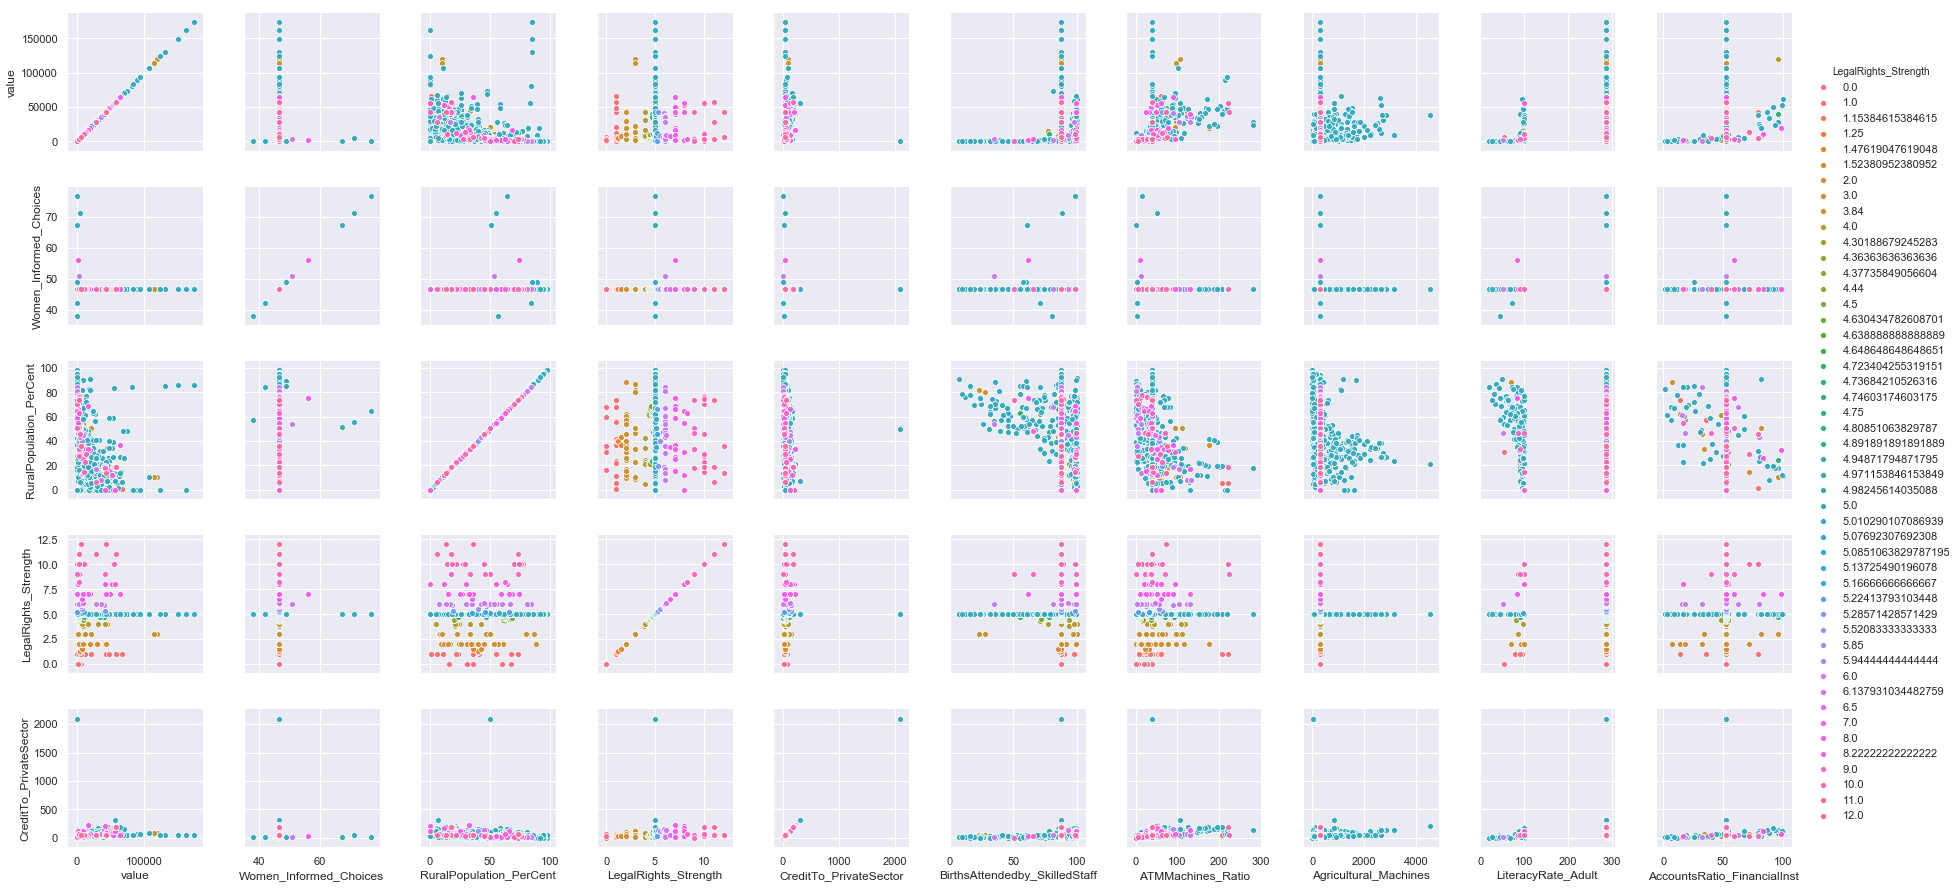

In [50]:
GDP_Combine_sample=GDP_Combine.sample(frac=.20)
plt.figure(figsize=(24,24))
x=['value','Women_Informed_Choices','RuralPopulation_PerCent','LegalRights_Strength','CreditTo_PrivateSector',
   'BirthsAttendedby_SkilledStaff','ATMMachines_Ratio','Agricultural_Machines','LiteracyRate_Adult','AccountsRatio_FinancialInst']
y1=['value','Women_Informed_Choices','RuralPopulation_PerCent','LegalRights_Strength','CreditTo_PrivateSector']
y2=['BirthsAttendedby_SkilledStaff','ATMMachines_Ratio','Agricultural_Machines','LiteracyRate_Adult','AccountsRatio_FinancialInst']
g=sns.pairplot(GDP_Combine_sample,hue="LegalRights_Strength",dropna=True,palette="husl",
              x_vars=x,y_vars=y1)
g.savefig("pairplot1.png")

<Figure size 1728x1728 with 0 Axes>

<Figure size 1728x1728 with 0 Axes>

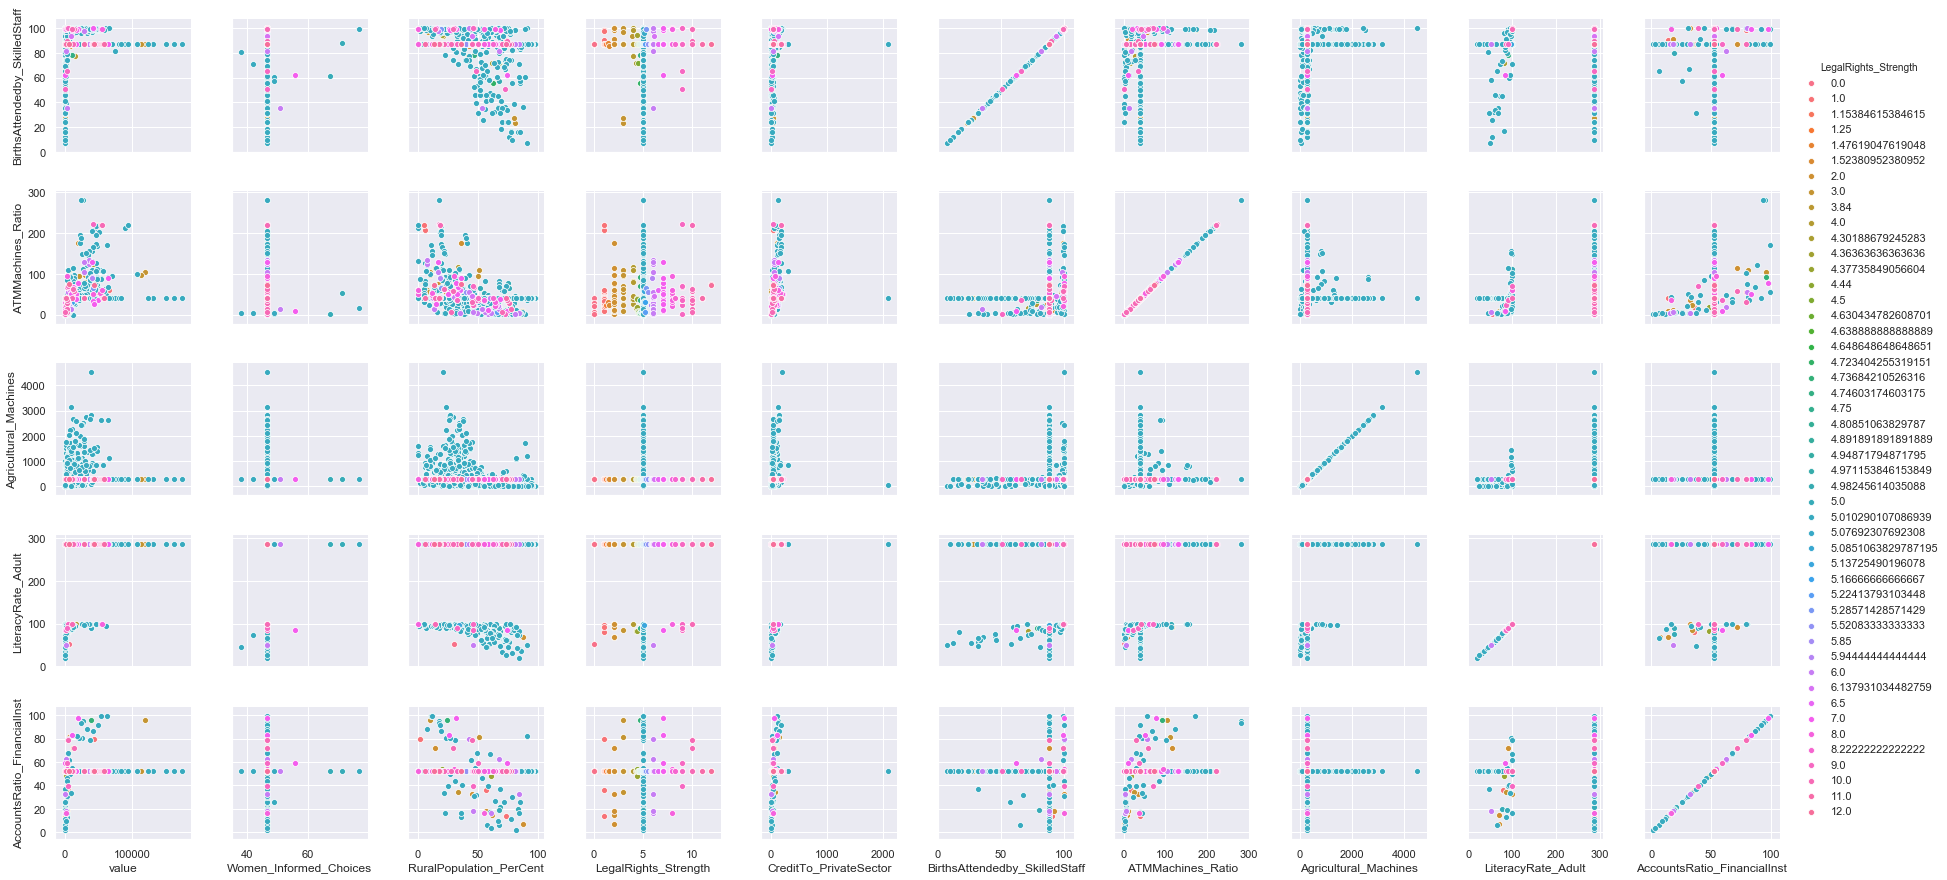

In [51]:
plt.figure(figsize=(24,24))
h=sns.pairplot(GDP_Combine_sample,hue="LegalRights_Strength",dropna=True,palette="husl",
              x_vars=x,y_vars=y2)
h.savefig("pairplot2.png")

In [52]:
corr_matrix = GDP_Combine.corr()
corr_matrix.style.background_gradient()

,value,Women_Informed_Choices,RuralPopulation_PerCent,LegalRights_Strength,CreditTo_PrivateSector,BirthsAttendedby_SkilledStaff,ATMMachines_Ratio,Agricultural_Machines,LiteracyRate_Adult,AccountsRatio_FinancialInst
value,1,0.00267067,-0.471648,0.0301545,0.0751591,0.151493,0.395548,0.239413,0.0257767,0.164084
Women_Informed_Choices,0.00267067,1,-0.00924476,0.0128095,0.00280309,0.0741236,0.0198545,-0.00111356,0.0123034,0.0303387
RuralPopulation_PerCent,-0.471648,-0.00924476,1,0.0132314,-0.0804114,-0.219623,-0.247643,-0.27558,0.00754356,-0.0930778
LegalRights_Strength,0.0301545,0.0128095,0.0132314,1,0.00889345,0.0106602,0.0663463,1.19578e-25,0.0317906,0.0401817
CreditTo_PrivateSector,0.0751591,0.00280309,-0.0804114,0.00889345,1,0.0317447,0.0690556,0.0398037,0.00533797,0.0273148
BirthsAttendedby_SkilledStaff,0.151493,0.0741236,-0.219623,0.0106602,0.0317447,1,0.154399,0.0841065,0.0969366,0.0711353
ATMMachines_Ratio,0.395548,0.0198545,-0.247643,0.0663463,0.0690556,0.154399,1,0.0293264,0.0393253,0.238556
Agricultural_Machines,0.239413,-0.00111356,-0.27558,1.19578e-25,0.0398037,0.0841065,0.0293264,1,0.0310576,-2.54406e-26
LiteracyRate_Adult,0.0257767,0.0123034,0.00754356,0.0317906,0.00533797,0.0969366,0.0393253,0.0310576,1,0.0322466
AccountsRatio_FinancialInst,0.164084,0.0303387,-0.0930778,0.0401817,0.0273148,0.0711353,0.238556,-2.54406e-26,0.0322466,1


<Figure size 864x864 with 0 Axes>

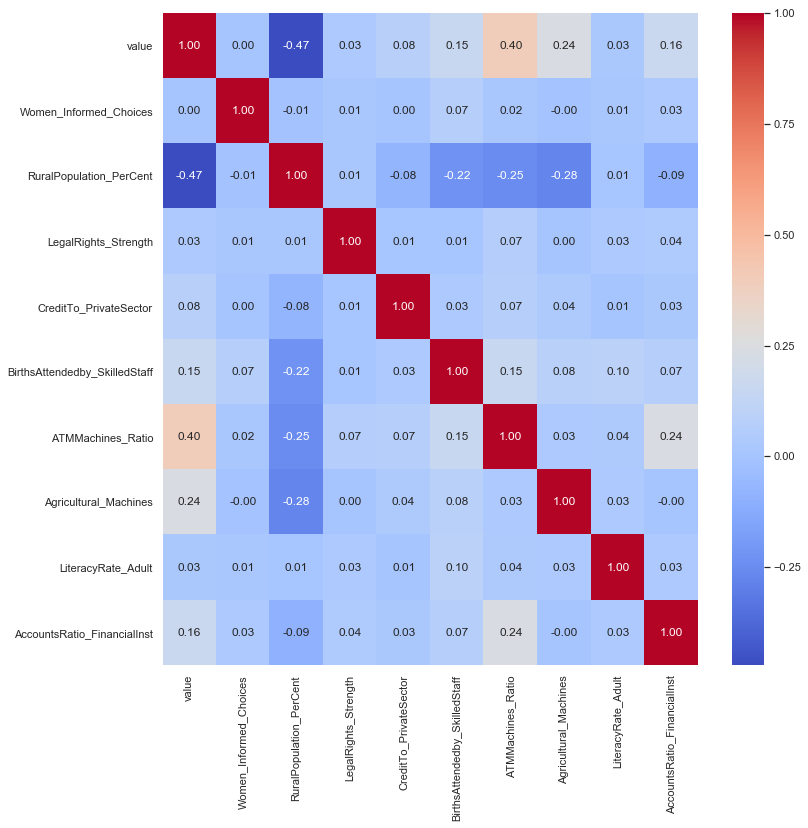

In [53]:
plt.figure(figsize=(12,12))
hm=sns.heatmap(corr_matrix,annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

## Combining the features

In [55]:
GDP_Combine_new=GDP_Combine
GDP_Combine_new['Literacy_creditToPriva']=GDP_Combine['LiteracyRate_Adult']*GDP_Combine['CreditTo_PrivateSector'];
GDP_Combine_new['Literacy_RuralPop']=GDP_Combine['LiteracyRate_Adult']*GDP_Combine['RuralPopulation_PerCent'];
GDP_Combine_new['Literacy_AgriMach']=GDP_Combine['LiteracyRate_Adult']*GDP_Combine['Agricultural_Machines'];
GDP_Combine_new['Literacy_AccountRa']=GDP_Combine['LiteracyRate_Adult']*GDP_Combine['AccountsRatio_FinancialInst'];
GDP_Combine_new['Literacy_ATM']=GDP_Combine['LiteracyRate_Adult']*GDP_Combine['ATMMachines_Ratio'];
GDP_Combine_new['Literacy_BirthAT']=GDP_Combine['LiteracyRate_Adult']*GDP_Combine['BirthsAttendedby_SkilledStaff'];
GDP_Combine_new['Literacy_Legal']=GDP_Combine['LiteracyRate_Adult']*GDP_Combine['LegalRights_Strength'];
GDP_Combine_new['Literacy_Woman']=GDP_Combine['LiteracyRate_Adult']*GDP_Combine['Women_Informed_Choices'];
GDP_Combine_new['Woman_Rural']=GDP_Combine['Women_Informed_Choices']*GDP_Combine['RuralPopulation_PerCent'];
GDP_Combine_new['Woman_CreditToPriv']=GDP_Combine['Women_Informed_Choices']*GDP_Combine['CreditTo_PrivateSector'];
GDP_Combine_new['Woman_AgriM']=GDP_Combine['Women_Informed_Choices']*GDP_Combine['Agricultural_Machines'];
GDP_Combine_new['Woman_ATM']=GDP_Combine['Women_Informed_Choices']*GDP_Combine['ATMMachines_Ratio'];
GDP_Combine_new['Woman_BirthAT']=GDP_Combine['Women_Informed_Choices']*GDP_Combine['BirthsAttendedby_SkilledStaff'];

<Figure size 864x864 with 0 Axes>

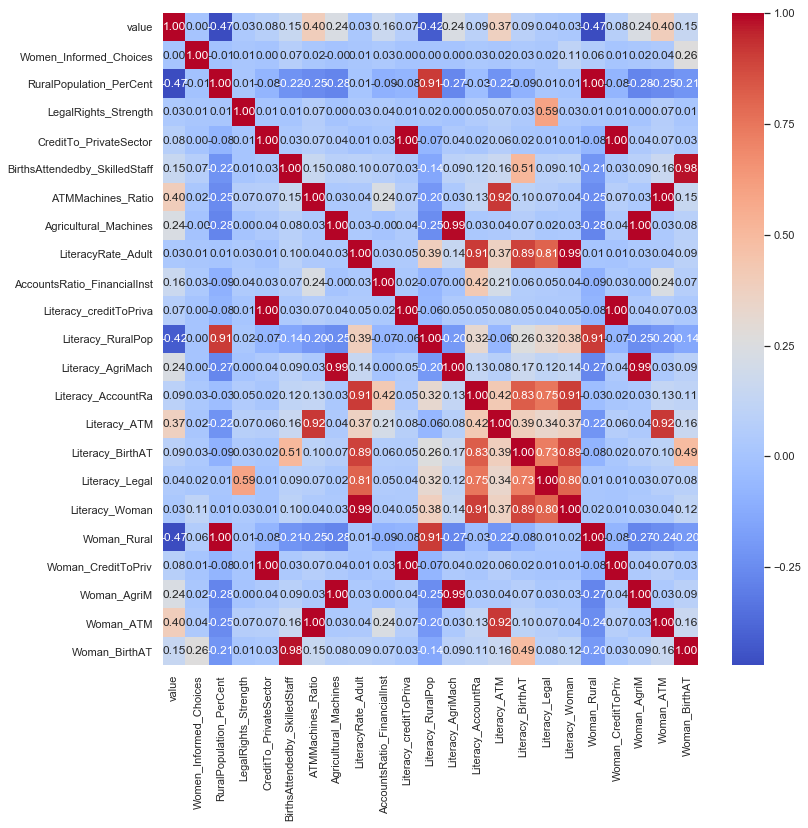

In [56]:
plt.figure(figsize=(12,12))
sns.heatmap(GDP_Combine_new.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

#### Splitting the Data Into Training and Test Set

In [57]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
### BEGIN SOLUTION

GDP_Combine_X = GDP_Combine.drop(['value'],axis=1)
GDP_Combine_X.rename(columns={'variable':'Year'}, inplace=True)
GDP_Combine_X = GDP_Combine_X[['Year','Women_Informed_Choices','RuralPopulation_PerCent','LegalRights_Strength','CreditTo_PrivateSector','BirthsAttendedby_SkilledStaff','ATMMachines_Ratio','Agricultural_Machines','LiteracyRate_Adult','AccountsRatio_FinancialInst']]

GDP_Combine_Y = GDP_Combine['value']
print(GDP_Combine_X.shape,GDP_Combine_Y.shape)

X_train,X_test,Y_train,Y_test = train_test_split(GDP_Combine_X,GDP_Combine_Y,test_size=0.2,random_state=40)

(11504, 10) (11504,)


##### Splitting the new data into test and train

In [58]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
### BEGIN SOLUTION

GDP_Combine_new_X = GDP_Combine_new.drop(['value'],axis=1)
GDP_Combine_new_X.rename(columns={'variable':'Year'}, inplace=True)
GDP_Combine_new_X = GDP_Combine_new_X[['Year','Women_Informed_Choices','RuralPopulation_PerCent','LegalRights_Strength',
                                       'CreditTo_PrivateSector','BirthsAttendedby_SkilledStaff','ATMMachines_Ratio',
                                       'Agricultural_Machines','LiteracyRate_Adult','AccountsRatio_FinancialInst',
                                      'Literacy_creditToPriva','Literacy_RuralPop','Literacy_AgriMach',
                                       'Literacy_AccountRa','Literacy_ATM','Literacy_BirthAT','Literacy_Legal',
                                       'Literacy_Woman','Woman_Rural','Woman_CreditToPriv','Woman_AgriM','Woman_ATM',
                                       'Woman_BirthAT']]

GDP_Combine_new_Y = GDP_Combine_new['value']
print(GDP_Combine_new_X.shape,GDP_Combine_new_Y.shape)

X_train_new,X_test_new,Y_train_new,Y_test_new = train_test_split(GDP_Combine_new_X,GDP_Combine_new_Y,test_size=0.2,random_state=40)

(11504, 23) (11504,)


Model 1 : Linear Regression

In [59]:
from sklearn.linear_model import LinearRegression

#fit the model to the training data (learn the coefficients)

model = LinearRegression()
model.fit(X_train,Y_train)
print(model.intercept_)
print(model.coef_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

-433196.45384709793
[ 215.12850832  -99.71979642 -171.08903421   37.97870795    1.29601506
   22.71891459  201.41578762    4.05447453   14.31367566  186.51595416]


In [60]:
y_pred_train_lr = model.predict(X_train)

In [61]:
y_actual_train = Y_train
mean_squared_error(y_actual_train, y_pred_train_lr)

123177992.91785857

In [62]:
from pandas import Series, DataFrame
model.score(X_train,Y_train)

0.37735031064806446

In [63]:
y_pred_test = model.predict(X_test)

In [64]:
y_actual_test = Y_test
mean_squared_error(y_actual_test, y_pred_test)

128992853.50891511

In [65]:
from pandas import Series, DataFrame
model.score(X_test,Y_test)

0.3910677547622228

In [66]:
from sklearn.model_selection import cross_val_score

model_knn = LinearRegression()
print(cross_val_score(model_knn, GDP_Combine_X, GDP_Combine_Y, cv=3))

[-48.34365397   0.27734051   0.10252783]


Model 2 : Polynomial Regression

In [67]:
from sklearn.preprocessing import PolynomialFeatures 
  
model_poly = PolynomialFeatures(degree = 4) 
X_train_plr = model_poly.fit_transform(X_train) 
X_test_plr = model_poly.fit_transform(X_test)
model1 = LinearRegression()
model1.fit(X_train_plr, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [68]:
Y_pred_plr_train = model1.predict(X_train_plr)
mean_squared_error(Y_train, Y_pred_plr_train)

72276593.27272506

In [69]:
Y_pred_plr_test = model1.predict(X_test_plr)
mean_squared_error(Y_test, Y_pred_plr_test)

271395519796580.56

In [70]:
from pandas import Series, DataFrame
model1.score(X_train_plr,Y_train)

0.6346506605389426

In [71]:
from pandas import Series, DataFrame
model1.score(X_test_plr,Y_test)

-1281166.7447369879

Model 3 : Decision Tree Regressor

In [72]:
from sklearn.tree import DecisionTreeRegressor

dtReg = DecisionTreeRegressor(max_depth=9)
dtReg.fit(X_train,Y_train)

dtReg_y_pred_train = dtReg.predict(X_train)
train_mse_dtreg = mean_squared_error(Y_train,dtReg_y_pred_train)
train_mse_dtreg

DecisionTreeRegressor(criterion='mse', max_depth=9, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

32886359.539759684

In [73]:
dtReg_y_pred_test = dtReg.predict(X_test)
test_mse_dtreg = mean_squared_error(Y_test,dtReg_y_pred_test)
test_mse_dtreg

56301396.06445242

In [74]:
from pandas import Series, DataFrame
dtReg.score(X_train,Y_train)

0.833763474576158

In [75]:
from pandas import Series, DataFrame
dtReg.score(X_test,Y_test)

0.7342198844125973

In [76]:
from sklearn.model_selection import cross_val_score
dtReg_knn = DecisionTreeRegressor(max_depth=9)
print(cross_val_score(dtReg_knn, GDP_Combine_X, GDP_Combine_Y, cv=3))

[-0.3159155   0.25176923  0.42880315]


Model 4 : Random Forest Regressor

In [77]:
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor

In [78]:
Rfreg = RandomForestRegressor(max_features=8, n_estimators=30)
Rfreg.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [79]:
Rfreg_y_pred_train = Rfreg.predict(X_train)
train_mse_Rfreg = mean_squared_error(Y_train,Rfreg_y_pred_train)
train_mse_Rfreg

8176165.8187829815

In [80]:
Rfreg_y_pred_test = Rfreg.predict(X_test)
test_mse_Rfreg = mean_squared_error(Y_test,Rfreg_y_pred_test)
test_mse_Rfreg

30746125.862930436

In [81]:
from pandas import Series, DataFrame
Rfreg.score(X_train,Y_train)

0.9586704817430334

In [82]:
from pandas import Series, DataFrame
Rfreg.score(X_test,Y_test)

0.8548577929335941

In [83]:
from sklearn.model_selection import cross_val_score
Rfreg_kf = RandomForestRegressor(max_features=8, n_estimators=30)
print(cross_val_score(Rfreg_kf, GDP_Combine_X, GDP_Combine_Y, cv=3))

[-0.307346    0.63978511  0.43480309]


##### Checking if add on features improve the results or not

In [84]:
#Random Forest tree method
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor
from pandas import Series, DataFrame
from sklearn.model_selection import cross_val_score

Rfreg_new = RandomForestRegressor(max_features=23, n_estimators=30)
Rfreg_new .fit(X_train_new , Y_train_new )
Rfreg_y_pred_train_new  = Rfreg_new .predict(X_train_new )
train_mse_Rfreg_new  = mean_squared_error(Y_train_new ,Rfreg_y_pred_train_new )

#testing the model
Rfreg_y_pred_test_new  = Rfreg_new.predict(X_test_new )
test_mse_Rfreg_new  = mean_squared_error(Y_test_new ,Rfreg_y_pred_test_new )
 
#cross validation

Rfreg_kf_new  = RandomForestRegressor(max_features=8, n_estimators=30)

print("New RMSE_train_Random= ",train_mse_Rfreg_new,
     "\nNew RMSE_test_Random= ",test_mse_Rfreg_new,
     "\nNew train_Rfeg score= ",Rfreg_new .score(X_train_new ,Y_train_new ),
     "\nNew test_Rfeg score= ",Rfreg_new .score(X_test_new ,Y_test_new ),
     "\nNew Cross validation score",cross_val_score(Rfreg_kf_new , GDP_Combine_new_X , GDP_Combine_new_Y,cv=3))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=23, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

New RMSE_train_Random=  8106581.751088779 
New RMSE_test_Random=  28978006.277041234 
New train_Rfeg score=  0.9590222206949949 
New test_Rfeg score=  0.8632044958709781 
New Cross validation score [-0.44778675  0.65970901  0.45254714]


Model 5 : K-Nearest Neighbor

In [85]:
model_knn = KNeighborsRegressor(n_neighbors=3)
model_knn.fit(X_train, Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='uniform')

In [86]:
Y_pred_knn_train = model_knn.predict(X_train)
mean_squared_error(Y_train, Y_pred_knn_train)

22563275.24570179

In [87]:
Y_pred_knn_test = model_knn.predict(X_test)
mean_squared_error(Y_test, Y_pred_knn_test)

50488838.5187355

In [88]:
from pandas import Series, DataFrame
model_knn.score(X_train,Y_train)

0.8859454031543845

In [89]:
from pandas import Series, DataFrame
model_knn.score(X_test,Y_test)

0.7616590302304124

In [90]:
from sklearn.model_selection import cross_val_score
model_knn1 = KNeighborsRegressor(n_neighbors=3)
print(cross_val_score(model_knn1, GDP_Combine_X, GDP_Combine_Y, cv=3))

[-0.75416075  0.61886192  0.39404495]


Model 6 : Ridge Regression

In [91]:
from sklearn.linear_model import Ridge
ridgeReg = Ridge(alpha=0.0001, normalize=True)
ridgeReg.fit(X_train,Y_train)

Ridge(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [92]:
pred_train = ridgeReg.predict(X_train)

In [93]:
mse_train = np.mean((pred_train - Y_train)**2)
mse_train

123177993.29190531

In [94]:
pred_test = ridgeReg.predict(X_test)

In [95]:
mse_test = np.mean((pred_test - Y_test)**2)
mse_test

128993021.01058424

In [96]:
ridgeReg.score(X_train,Y_train)

0.3773503087573028

In [97]:
ridgeReg.score(X_test,Y_test)

0.39106696404270125

Using PCA

In [98]:
from sklearn.decomposition import PCA# Make an instance of the Model
pca = PCA(.95)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [99]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [100]:
model_pca = LinearRegression()
model_pca.fit(X_train_pca,Y_train)
y_pred_train_lr_pca = model_pca.predict(X_train_pca)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [101]:
y_actual_train = Y_train
mean_squared_error(y_actual_train, y_pred_train_lr_pca)

185670201.17500514

In [102]:
from pandas import Series, DataFrame
model_pca.score(X_train_pca,Y_train)

0.06145984079622613

In [103]:
y_pred_test_lr_pca = model_pca.predict(X_test_pca)
y_actual_test = Y_test
mean_squared_error(y_actual_test, y_pred_test_lr_pca)

198698640.41463205

In [104]:
from pandas import Series, DataFrame
model_pca.score(X_test_pca,Y_test)

0.06200998007216463

In [105]:
from sklearn.tree import DecisionTreeRegressor

dtReg = DecisionTreeRegressor(max_depth=9)
dtReg.fit(X_train_pca,Y_train)

dtReg_y_pred_train_pca = dtReg.predict(X_train_pca)
train_mse_dtreg_pca = mean_squared_error(Y_train,dtReg_y_pred_train_pca)
train_mse_dtreg_pca

DecisionTreeRegressor(criterion='mse', max_depth=9, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

51669229.77287218

In [106]:
dtReg_y_pred_test_pca = dtReg.predict(X_test_pca)
test_mse_dtreg_pca = mean_squared_error(Y_test,dtReg_y_pred_test_pca)
test_mse_dtreg_pca

76252829.96688907

In [107]:
from pandas import Series, DataFrame
dtReg.score(X_train_pca,Y_train)

0.7388183627201453

In [108]:
from pandas import Series, DataFrame
dtReg.score(X_test_pca,Y_test)

0.6400358183078483

In [109]:
Rfreg_pca = RandomForestRegressor(max_features=2, n_estimators=30)
Rfreg_pca.fit(X_train_pca, Y_train)
Rfreg_y_pred_train_pca = Rfreg_pca.predict(X_train_pca)
train_mse_Rfreg_pca = mean_squared_error(Y_train,Rfreg_y_pred_train_pca)
train_mse_Rfreg_pca

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

14331271.358571228

In [110]:
Rfreg_y_pred_test_pca = Rfreg_pca.predict(X_test_pca)
test_mse_Rfreg_pca = mean_squared_error(Y_test,Rfreg_y_pred_test)
test_mse_Rfreg_pca

30746125.862930436

In [111]:
from pandas import Series, DataFrame
Rfreg_pca.score(X_train_pca,Y_train)

0.9275571760177712

In [112]:
from pandas import Series, DataFrame
Rfreg_pca.score(X_test_pca,Y_test)

0.6593685199835387